In [1]:
#download data from kaggle
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
# imputing missing values in num_cols
from sklearn.impute import SimpleImputer
# scaling numeric value in 1-0 range
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer
# Combine the numerical and categorical pipelines
from sklearn.compose import ColumnTransformer

In [4]:
od.download("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data")
#hemantk777  721b095dacb7cfa6129768282921b8fb

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemantk777
Your Kaggle Key: ··········


100%|██████████| 199k/199k [00:00<00:00, 362MB/s]


Extracting archive ./house-prices-advanced-regression-techniques/house-prices-advanced-regression-techniques.zip to ./house-prices-advanced-regression-techniques


In [5]:
raw_data=pd.read_csv("/content/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv("/content/house-prices-advanced-regression-techniques/test.csv")

In [6]:
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [8]:
raw_data.shape

(1460, 81)

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
raw_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
raw_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
correlation=raw_data.select_dtypes(include=['number']).corr()
correlation.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


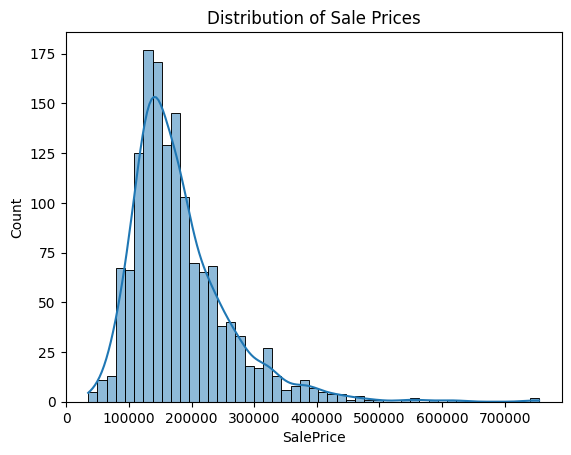

In [13]:
sns.histplot(raw_data['SalePrice'], kde=True)
plt.title("Distribution of Sale Prices")
plt.show()

In [14]:
# checking missing values
missing_value=raw_data.isna().sum().sort_values(ascending=False).head(20)
#missing_values=[i for i in missing_value]
missing_value

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [15]:
# See percentage of missing data
((raw_data.isnull().sum() / len(raw_data)) * 100).sort_values(ascending=False).head(10).reset_index()


,index,0
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,MasVnrType,59.726027
5,FireplaceQu,47.260274
6,LotFrontage,17.739726
7,GarageQual,5.547945
8,GarageFinish,5.547945
9,GarageType,5.547945


In [16]:
#   numeric dataframe and cols   &   catagorical dataframe and cols
num_df=raw_data.select_dtypes(include=['int64','float64'])
num_cols=num_df.columns.tolist()

cat_df=raw_data.select_dtypes(exclude=['int64','float64'])
cat_cols=cat_df.columns.tolist()

cat_df.shape[1] + num_df.shape[1]

81

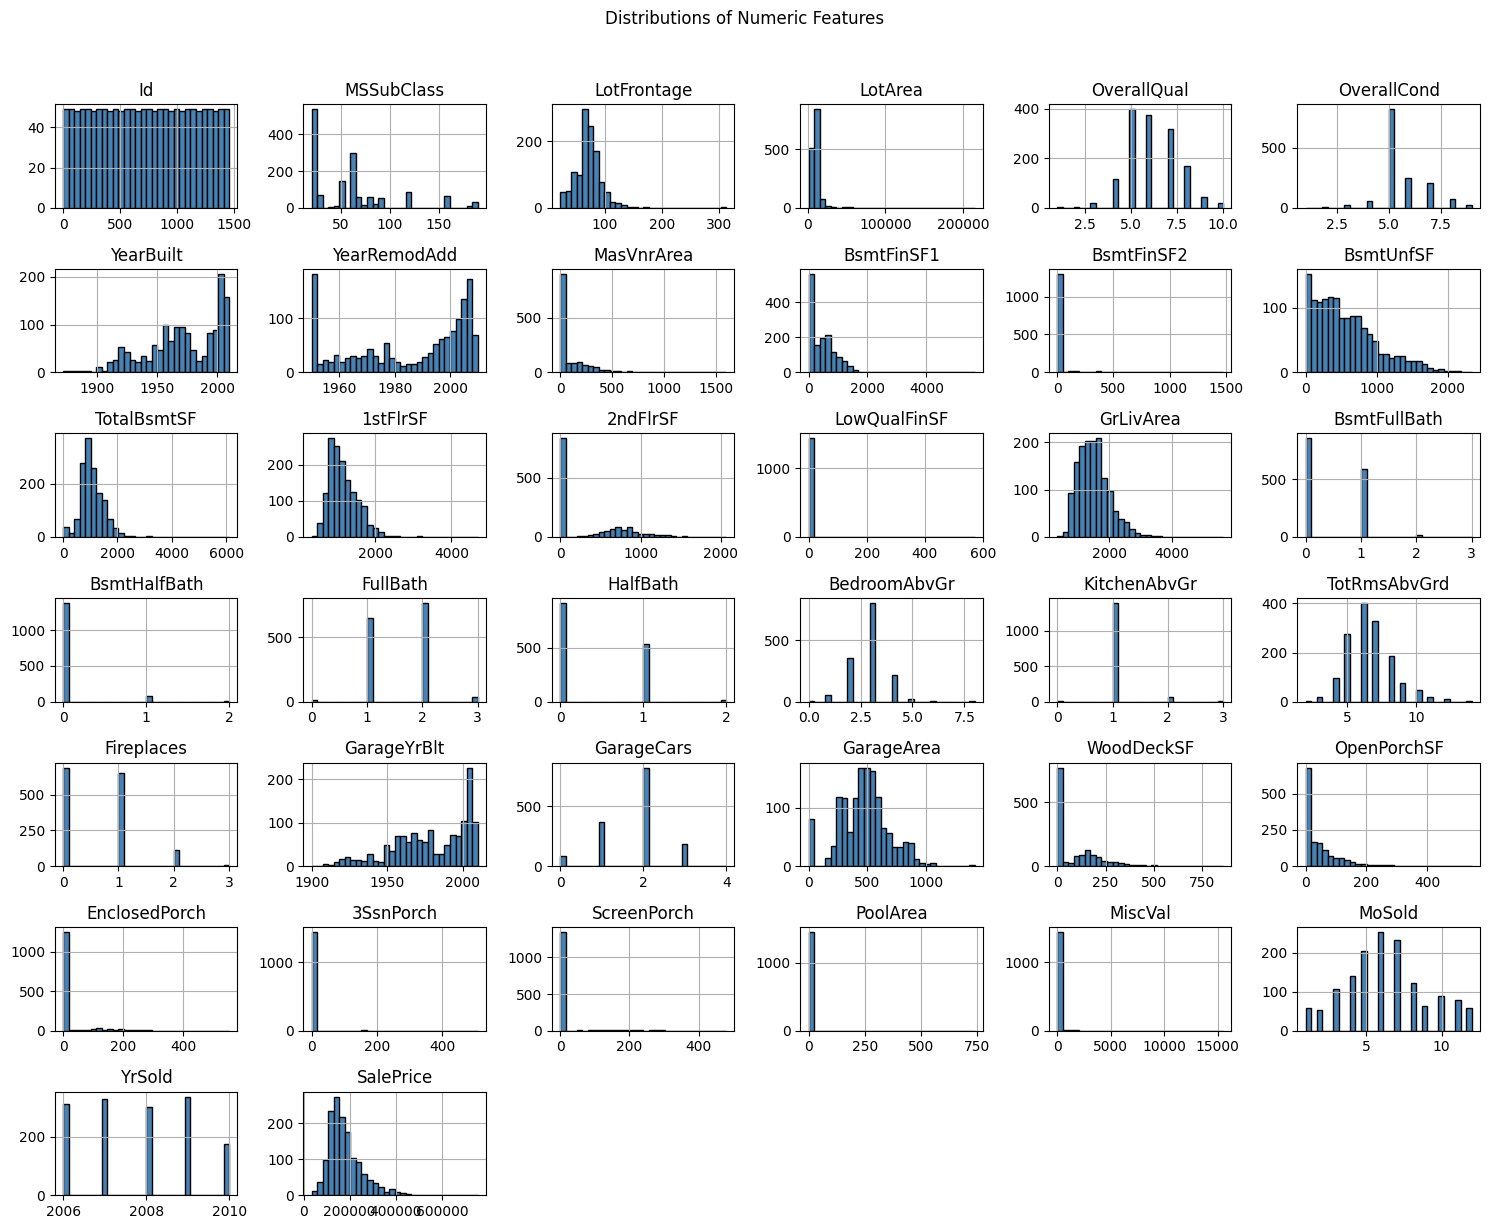

In [17]:
num_df.hist(
    figsize=(15, 12),
    bins=30,
    color='steelblue',          # change bar colour
    edgecolor='black',
    sharex=False, sharey=False  # independent axes
)
plt.suptitle("Distributions of Numeric Features", y=1.02)  # y moves title up
plt.tight_layout()                                         # fixes subplot spacing
plt.show()


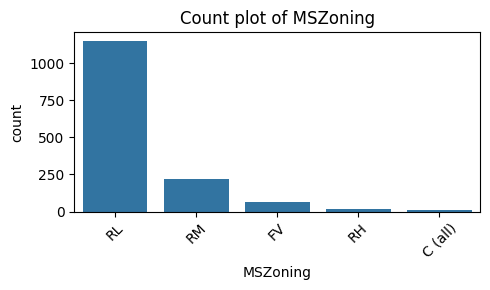

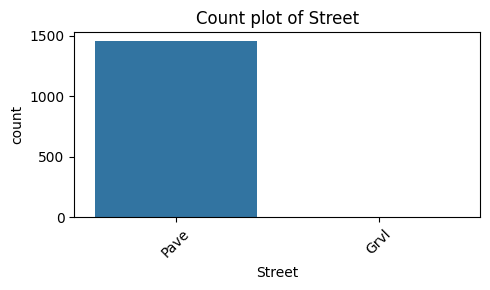

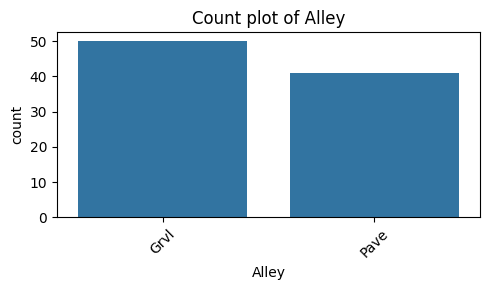

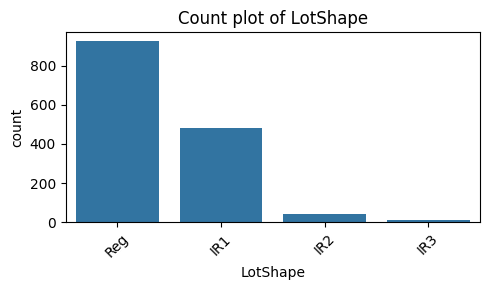

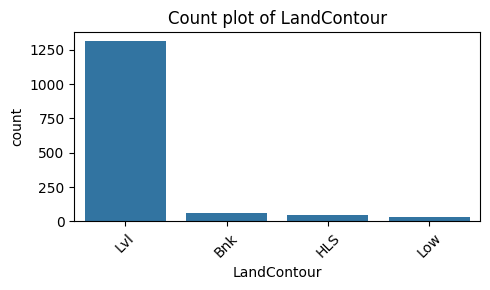

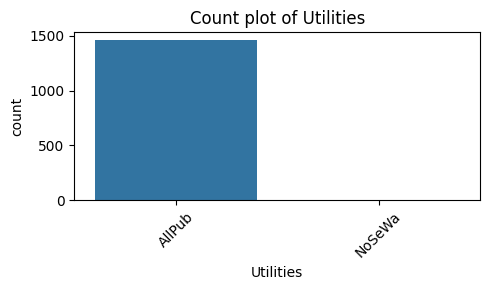

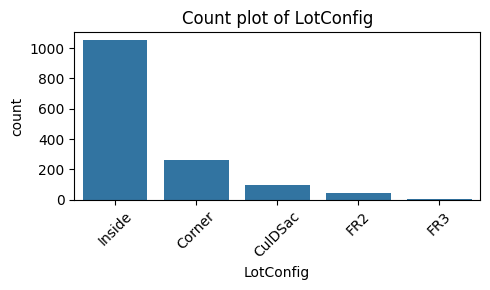

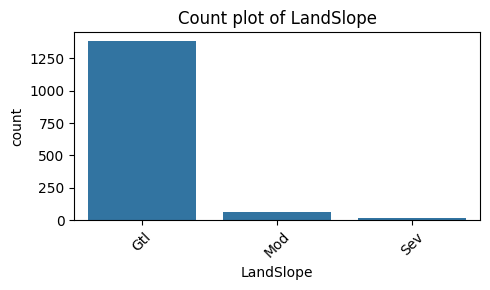

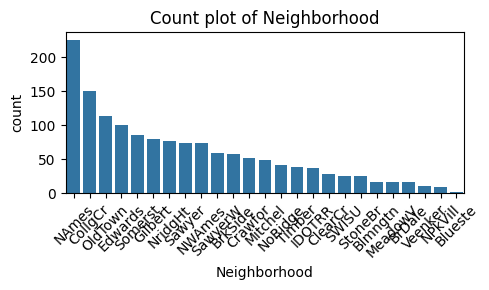

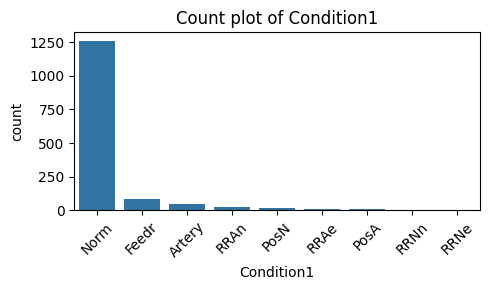

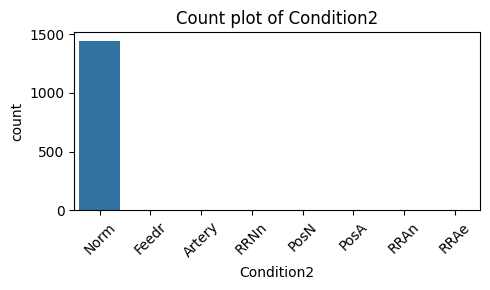

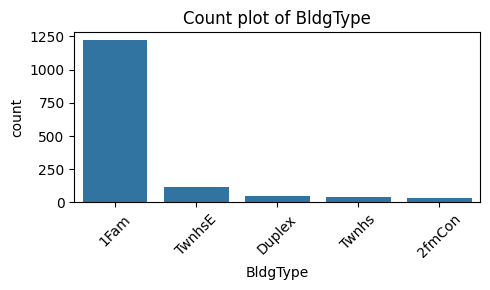

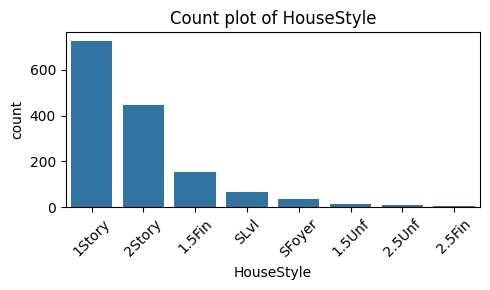

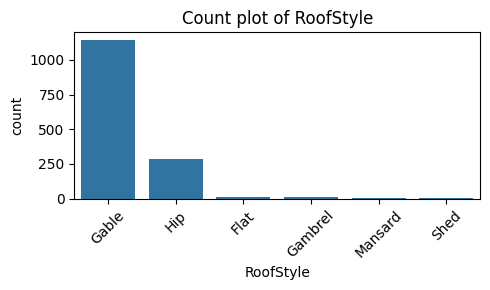

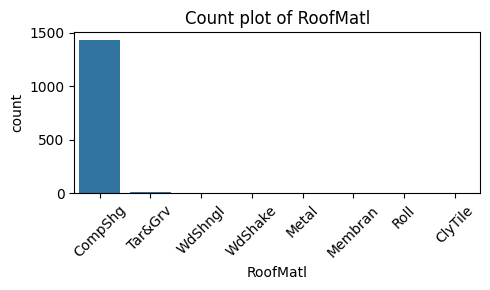

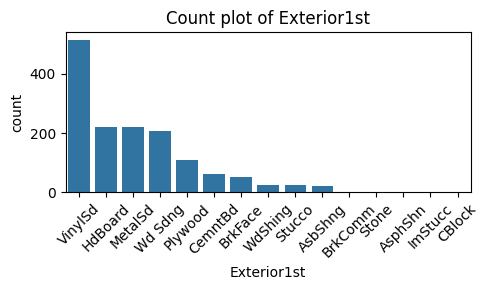

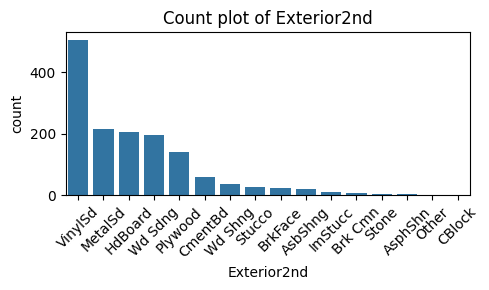

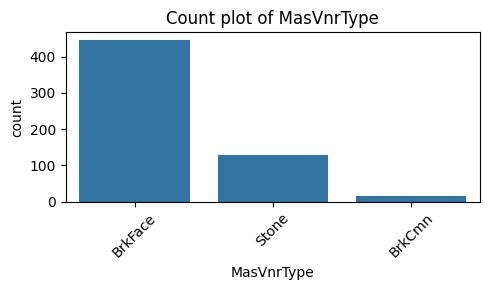

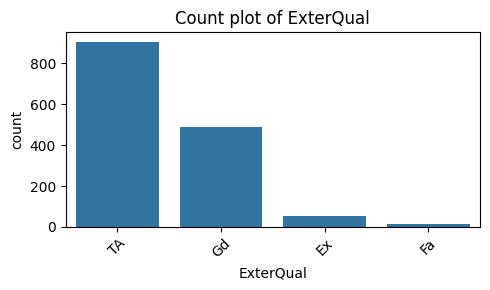

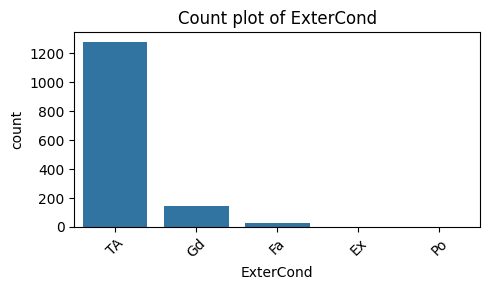

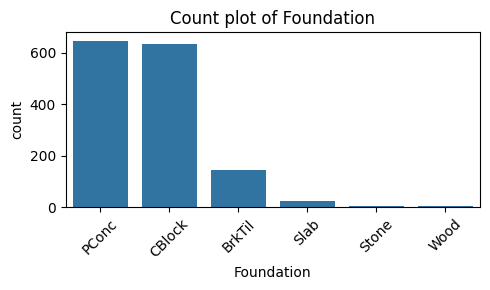

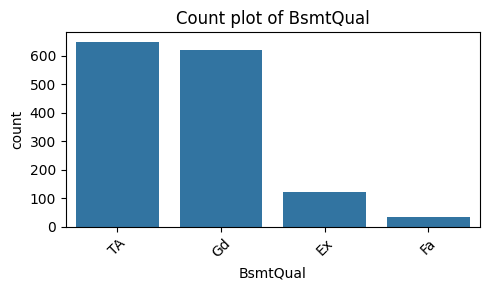

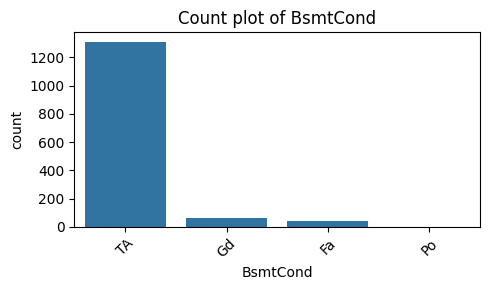

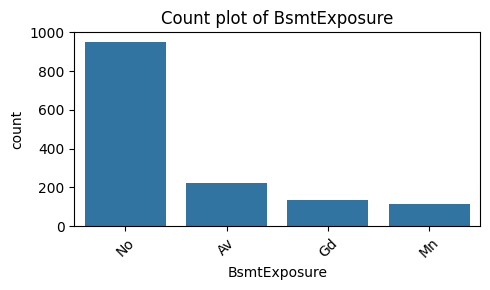

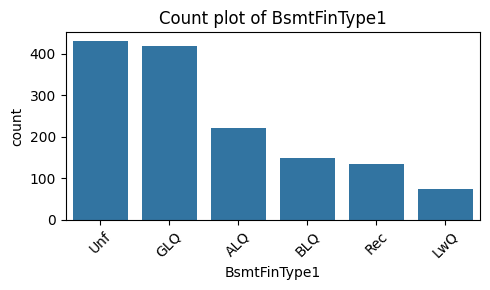

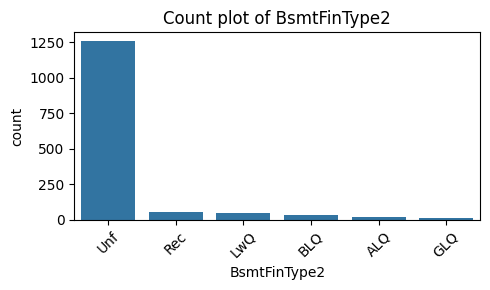

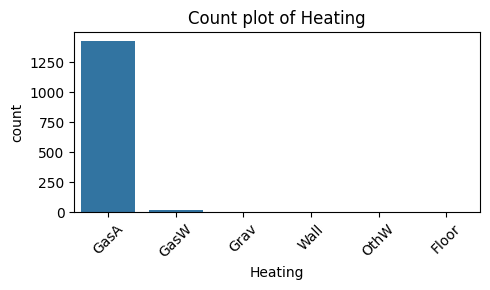

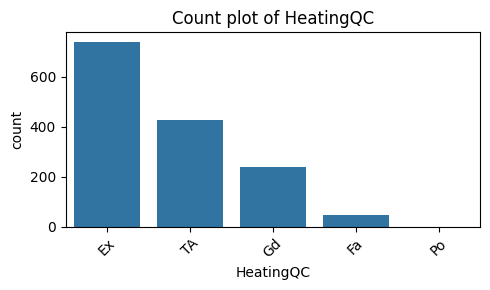

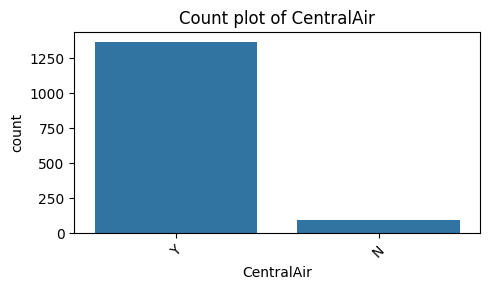

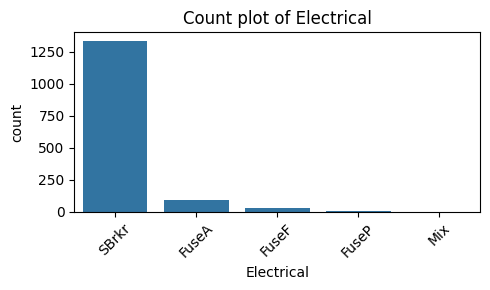

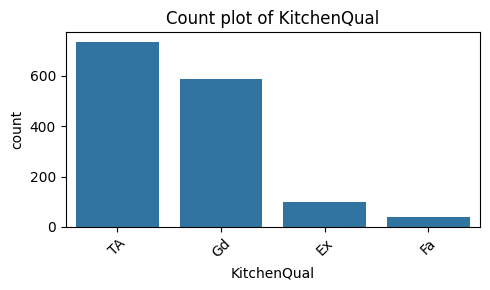

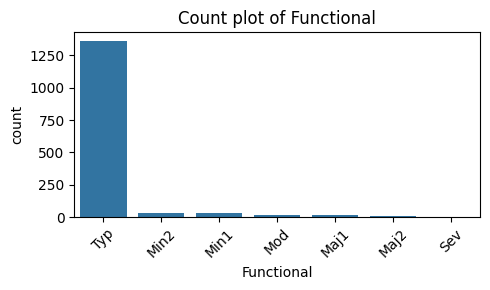

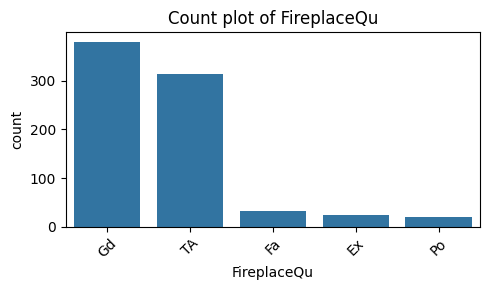

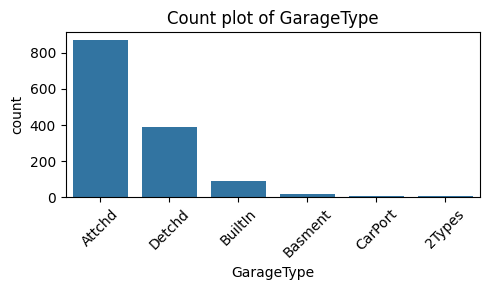

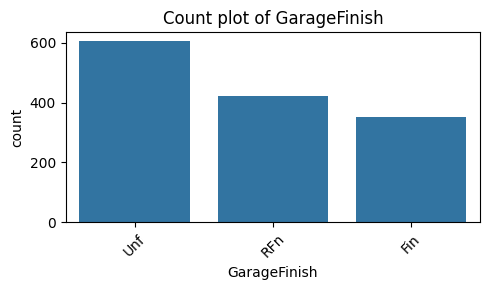

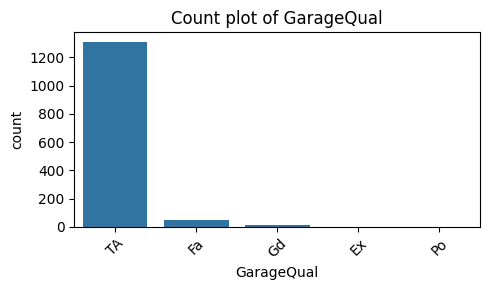

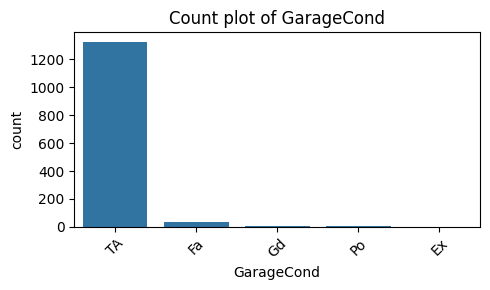

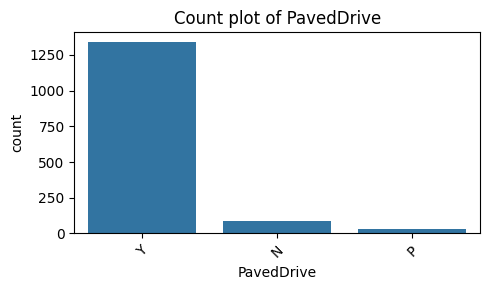

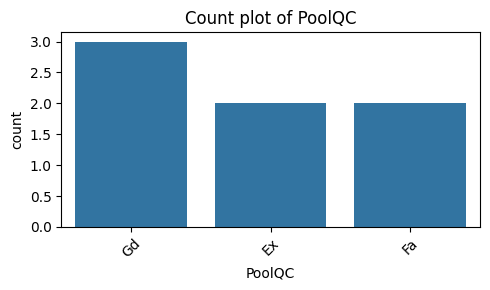

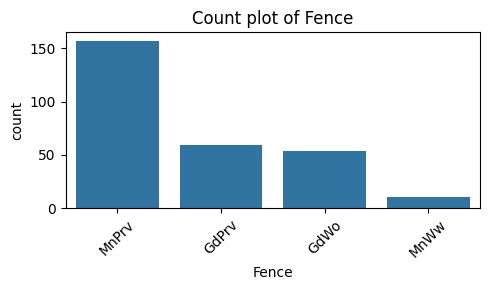

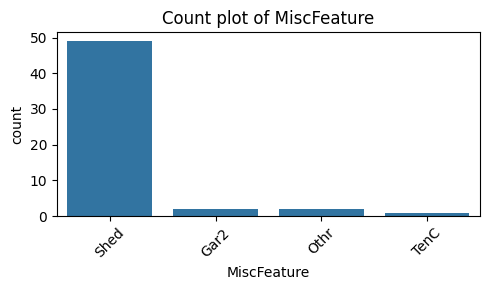

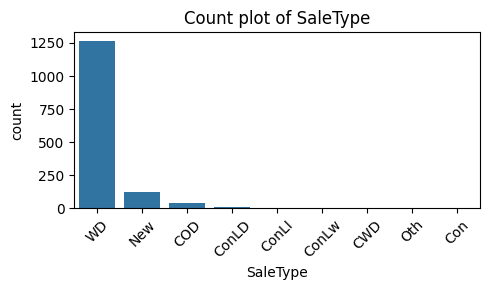

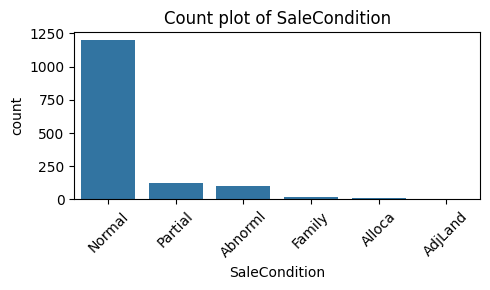

In [18]:
for col in cat_df.columns:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=raw_data, order=raw_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Count plot of {col}')
    plt.tight_layout()
    plt.show()


In [19]:
# Check correlation with target
correlation_with_target=correlation.corr()['SalePrice'].sort_values(ascending=False).head(15)
correlation_with_target

,SalePrice
SalePrice,1.000000
OverallQual,0.962500
GarageCars,0.903554
GarageArea,0.900257
TotalBsmtSF,0.817396
GrLivArea,0.814702
FullBath,0.811329
MasVnrArea,0.807608
1stFlrSF,0.797333
YearBuilt,0.785608


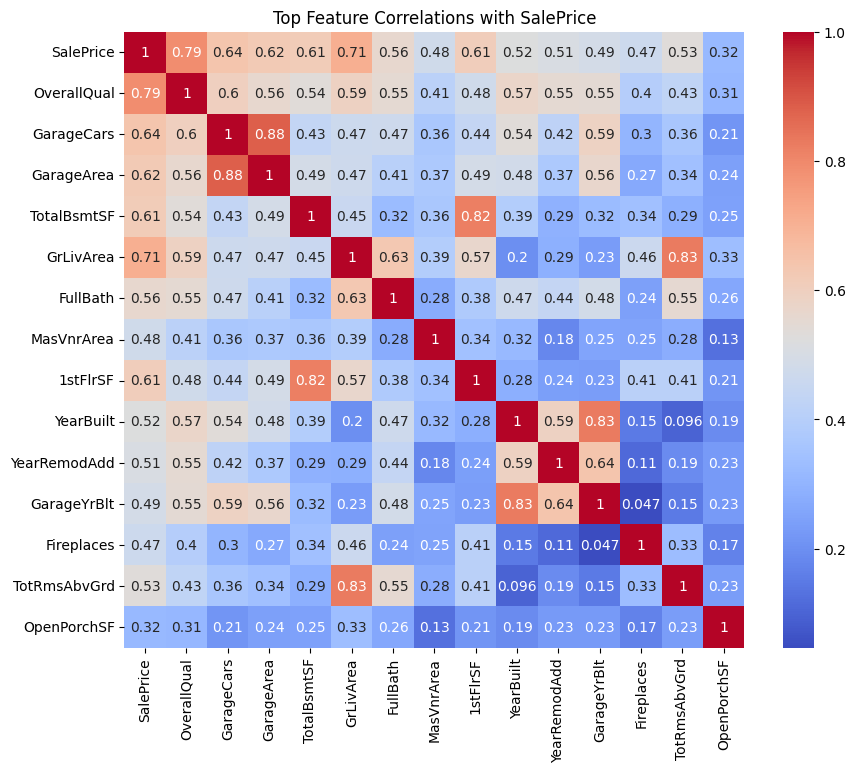

<Figure size 700x300 with 0 Axes>

In [20]:
# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(raw_data[correlation_with_target.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with SalePrice")
plt.figure(figsize=(7, 3))
plt.show()


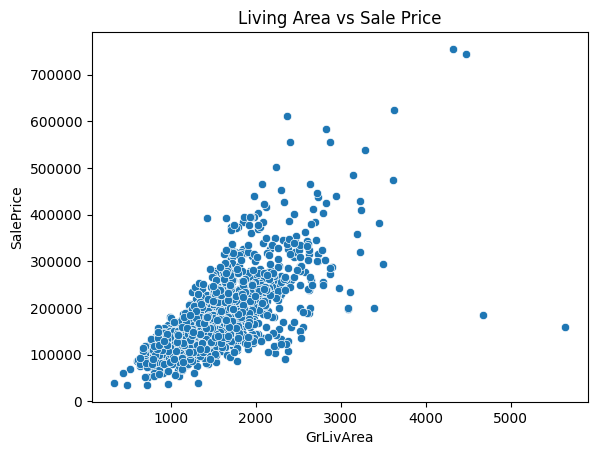

In [21]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=raw_data)
plt.title("Living Area vs Sale Price")
plt.show()


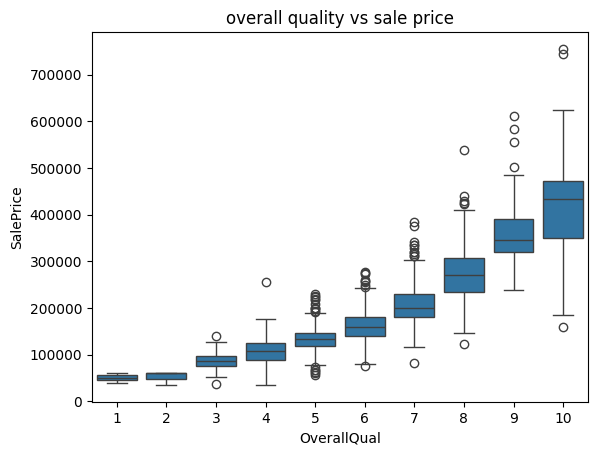

In [22]:
sns.boxplot(x='OverallQual', y='SalePrice', data=raw_data)
plt.title("overall quality vs sale price")
plt.savefig("overall quality vs sale price1", dpi=300, bbox_inches='tight')
plt.show()


In [23]:
# Sort largest living areas to see if prices are aligned
raw_data.sort_values('GrLivArea', ascending=False)[['GrLivArea', 'SalePrice']].head(10)


,GrLivArea,SalePrice
1298,5642,160000
523,4676,184750
1182,4476,745000
691,4316,755000
1169,3627,625000
185,3608,475000
304,3493,295000
1268,3447,381000
635,3395,200000
769,3279,538000


# Day 3: Data Cleaning & Preprocessing

In [28]:
raw_data.isnull().sum().sort_values(ascending=False).head(15)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [29]:
#Drop Columns with Too Many Missing Values  Columns like [PoolQC, Alley, Fence, MiscFeature] have too many NAs.
raw_data=raw_data.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature", "FireplaceQu","MasVnrType"]).copy()

In [30]:
raw_data.shape

(1460, 75)

In [31]:
# imputing / filling missing values in num_cols
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median').fit(raw_data[num_cols])
raw_data[num_cols]=imputer.transform(raw_data[num_cols])

In [35]:
raw_data[num_cols].isna().sum()

,0
Id,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0


In [45]:
## imputing / filling missing values in cat_cols
raw_data[cat_cols] = raw_data[cat_cols].fillna(raw_data[cat_cols].mode().iloc[0])

In [46]:
# for removing cols name i.e already drop in prev step['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

to_remove = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
cat_cols = [col for col in cat_cols if col not in to_remove]
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [47]:
# encode categorical cols in one hot encoder
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(raw_data[cat_cols])
encoded_cols=list(encoder.get_feature_names_out(cat_cols))    # cols name for encoded cols
raw_data[encoded_cols]=encoder.transform(raw_data[cat_cols])

In [48]:
raw_data[encoded_cols].shape

(1460, 230)

In [52]:
#combine num and cat cols
raw_data_new=raw_data[num_cols] + raw_data[encoded_cols]
raw_data_new.shape

(1460, 268)

In [53]:
#Check Skewness & Fix It (Shrinks big numbers so outliers don’t dominate)
from scipy.stats import skew
import numpy as np

numeric_feats = raw_data.select_dtypes(include=['int64', 'float64']).columns
skewed_feats = raw_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
high_skew = skewed_feats[skewed_feats > 0.75]

raw_data[high_skew.index] = np.log1p(raw_data[high_skew.index])

In [55]:
raw_data[high_skew.index].head(2)

,ExterCond_Po,HeatingQC_Po,Heating_Floor,Utilities_NoSeWa,Exterior2nd_Other,Electrical_Mix,Condition2_PosA,Condition2_RRAe,RoofMatl_Metal,RoofMatl_ClyTile,...,HeatingQC_Gd,LotConfig_Corner,RoofStyle_Hip,GarageFinish_Fin,GarageType_Detchd,BsmtFinType1_GLQ,GarageFinish_RFn,HeatingQC_TA,HouseStyle_2Story,BsmtFinType1_Unf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.423036,0.423036,0.0,0.423036,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.423036,0.0,0.000000,0.0


In [58]:
raw_data.to_csv("cleaned_train.csv", index=False)
